<a href="https://colab.research.google.com/github/Pranov1984/Digit-Recognition-in-photographs/blob/master/Digit_Recognition_SVNH_V2_DenseLayers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the data
import h5py
import numpy as np

ds=h5py.File('/content/drive/My Drive/Colab Notebooks/AIML/ANN/Project SVNH - NN & DL/SVHN_single_grey1.h5','r')

X_train = ds['X_train'][:]
y_train = ds['y_train'][:]
X_test = ds['X_test'][:]
y_test = ds['y_test'][:]

# Close this file
ds.close()

In [ ]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((42000, 32, 32), (18000, 32, 32), (42000,), (18000,))

In [ ]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

2


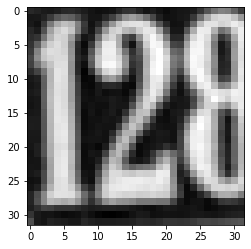

In [ ]:
print(y_train[0])
plt.imshow(X_train[0], cmap='gray')

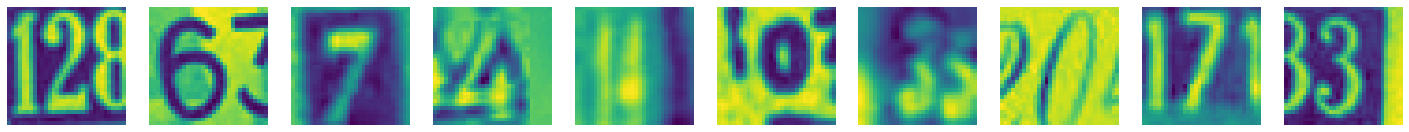

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
plt.figure(figsize=(25,15))
col=10
rows=1
for i in range(10):
  plt.subplot(rows,col,i+1)
  plt.imshow(X_train[i])
  plt.axis('off')
plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## PreProcessing

*   Flatten the data i.e. reduce it to grey scale (1 channel)
*   Normalize the data




In [ ]:
train_X = X_train.reshape(X_train.shape[0], 32*32)
train_X = train_X.astype('float64')/255.0
test_X  = X_test.reshape(X_test.shape[0], 32*32)
test_X  = test_X.astype('float64')/255.0

### One Hot encode the y variable

In [ ]:
from keras.utils import to_categorical

train_y = to_categorical(y_train, 10)
test_y = to_categorical(y_test, 10)

# Split the training data to have another set for validtion of the model

In [ ]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, random_state = 1 , test_size=0.2)

In [ ]:
train_X.shape , train_y.shape, test_X.shape, test_y.shape, val_X.shape, val_y.shape

((26880, 1024),
 (26880, 10),
 (18000, 1024),
 (18000, 10),
 (6720, 1024),
 (6720, 10))

### Model Building

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation, Dropout
from keras import optimizers

In [ ]:
model =  Sequential()
model.add(Dense(512, input_shape = (32*32,), activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 531,978
Trainable params: 530,954
Non-trainable params: 1,024
_________________________________________________________________


In [ ]:
opt = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model.fit(train_X, train_y, validation_data=(test_X, test_y), batch_size=1024, epochs=50)

Epoch 1/50
27/27 [==============================] - 2s 79ms/step - loss: 2.4821 - accuracy: 0.1381 - val_loss: 4.6193 - val_accuracy: 0.0973
Epoch 2/50
27/27 [==============================] - 2s 71ms/step - loss: 2.0498 - accuracy: 0.2679 - val_loss: 2.1651 - val_accuracy: 0.2582
Epoch 3/50
27/27 [==============================] - 2s 70ms/step - loss: 1.7819 - accuracy: 0.3874 - val_loss: 1.9087 - val_accuracy: 0.3141
Epoch 4/50
27/27 [==============================] - 2s 69ms/step - loss: 1.5470 - accuracy: 0.4839 - val_loss: 1.9704 - val_accuracy: 0.3373
Epoch 5/50
27/27 [==============================] - 2s 68ms/step - loss: 1.4126 - accuracy: 0.5414 - val_loss: 1.8156 - val_accuracy: 0.3903
Epoch 6/50
27/27 [==============================] - 2s 69ms/step - loss: 1.2955 - accuracy: 0.5898 - val_loss: 1.6517 - val_accuracy: 0.4487
Epoch 7/50
27/27 [==============================] - 2s 68ms/step - loss: 1.1939 - accuracy: 0.6273 - val_loss: 1.5470 - val_accuracy: 0.4955
Epoch 8/50
27

In [ ]:
results = model.evaluate(val_X, val_y)

210/210 [==============================] - 1s 3ms/step - loss: 1.3707 - accuracy: 0.6354


Try with a differnt (reduced) batch size

In [ ]:
h = model.fit(train_X, train_y, validation_data=(test_X, test_y), batch_size=512, epochs=50)

Epoch 1/50
53/53 [==============================] - 2s 39ms/step - loss: 0.5223 - accuracy: 0.8407 - val_loss: 1.0245 - val_accuracy: 0.7331
Epoch 2/50
53/53 [==============================] - 2s 38ms/step - loss: 0.5249 - accuracy: 0.8388 - val_loss: 0.9615 - val_accuracy: 0.7431
Epoch 3/50
53/53 [==============================] - 2s 38ms/step - loss: 0.5228 - accuracy: 0.8410 - val_loss: 0.9323 - val_accuracy: 0.7509
Epoch 4/50
53/53 [==============================] - 2s 38ms/step - loss: 0.5277 - accuracy: 0.8388 - val_loss: 1.0549 - val_accuracy: 0.7251
Epoch 5/50
53/53 [==============================] - 2s 39ms/step - loss: 0.5220 - accuracy: 0.8424 - val_loss: 0.9996 - val_accuracy: 0.7388
Epoch 6/50
53/53 [==============================] - 2s 38ms/step - loss: 0.5248 - accuracy: 0.8420 - val_loss: 1.0342 - val_accuracy: 0.7237
Epoch 7/50
53/53 [==============================] - 2s 39ms/step - loss: 0.5222 - accuracy: 0.8401 - val_loss: 0.8962 - val_accuracy: 0.7558
Epoch 8/50
53

In [ ]:
results = model.evaluate(test_X, test_y)

563/563 [==============================] - 1s 3ms/step - loss: 0.9735 - accuracy: 0.7462


In [ ]:
results = model.evaluate(val_X, val_y)

210/210 [==============================] - 1s 3ms/step - loss: 0.9613 - accuracy: 0.7437


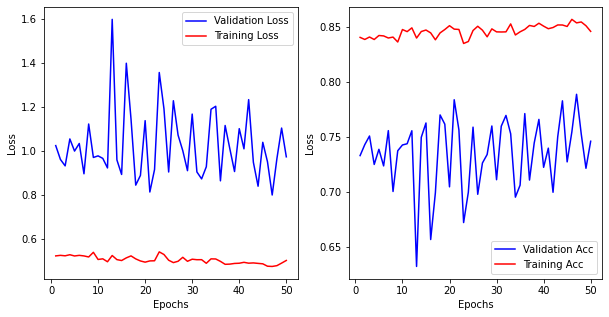

In [ ]:
model_val_loss = h.history['val_loss']
model_train_loss = h.history['loss']
model_val_acc = h.history['val_accuracy']
model_train_acc = h.history['accuracy']


epochs = range(1,51)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, model_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, model_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, model_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## Add another dense layer and add dropouts

In [ ]:
model =  Sequential()
model.add(Dense(512, input_shape = (32*32,), activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))


model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2570      
Total params: 660,746
Trainable params: 659,722
Non-trainable params: 1,024
_________________________________________________________________


In [ ]:
opt = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
h= model.fit(train_X, train_y, batch_size=512, epochs=50, validation_data=(test_X, test_y))

Epoch 1/50
53/53 [==============================] - 3s 53ms/step - loss: 2.6361 - accuracy: 0.1588 - val_loss: 2.0868 - val_accuracy: 0.2448
Epoch 2/50
53/53 [==============================] - 3s 51ms/step - loss: 1.6534 - accuracy: 0.4226 - val_loss: 2.8854 - val_accuracy: 0.3012
Epoch 3/50
53/53 [==============================] - 3s 51ms/step - loss: 1.2488 - accuracy: 0.6015 - val_loss: 1.7433 - val_accuracy: 0.4677
Epoch 4/50
53/53 [==============================] - 3s 51ms/step - loss: 1.1041 - accuracy: 0.6567 - val_loss: 2.4455 - val_accuracy: 0.3650
Epoch 5/50
53/53 [==============================] - 3s 51ms/step - loss: 1.0227 - accuracy: 0.6880 - val_loss: 1.2051 - val_accuracy: 0.6333
Epoch 6/50
53/53 [==============================] - 3s 51ms/step - loss: 0.9670 - accuracy: 0.7065 - val_loss: 3.2295 - val_accuracy: 0.3073
Epoch 7/50
53/53 [==============================] - 3s 51ms/step - loss: 0.9222 - accuracy: 0.7183 - val_loss: 2.6670 - val_accuracy: 0.3714
Epoch 8/50
53

In [ ]:
results = model.evaluate(val_X, val_y)

210/210 [==============================] - 1s 4ms/step - loss: 1.1496 - accuracy: 0.7116


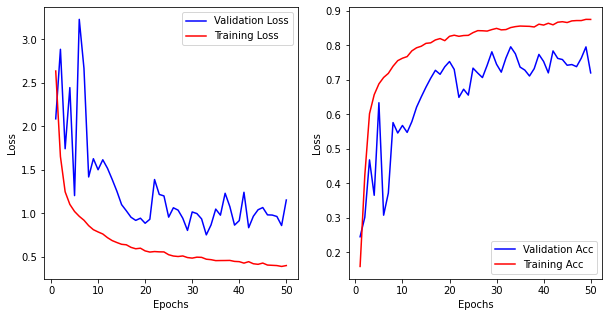

In [ ]:
model_val_loss = h.history['val_loss']
model_train_loss = h.history['loss']
model_val_acc = h.history['val_accuracy']
model_train_acc = h.history['accuracy']


epochs = range(1,51)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, model_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, model_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, model_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### We are seeing overfitting as the training accuracy is much higher than test and val accuracy. Let's introduce regularization in the training and check the performance.

#### Regularization can be done by addition of noise to training data.

Noise Regularization in Keras
Keras supports the addition of noise to models via the GaussianNoise layer.

This is a layer that will add noise to inputs of a given shape. The noise has a mean of zero and requires that a standard deviation of the noise be specified as a parameter

In [ ]:
from keras.layers import GaussianNoise

In [ ]:
model =  Sequential()
model.add(Dense(512, input_shape = (32*32,), activation='relu', kernel_initializer='he_normal'))
model.add(GaussianNoise(0.1))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.1))


model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               524800    
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 512)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2570      
Total params: 660,746
Trainable params: 659,722
Non-trainable params: 1,024
___________________________________________

In [ ]:
opt = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics='accuracy')

h= model.fit(train_X, train_y, batch_size=512, epochs=50, validation_data=(test_X, test_y))

Epoch 1/50
53/53 [==============================] - 3s 58ms/step - loss: 2.7908 - accuracy: 0.1546 - val_loss: 2.1640 - val_accuracy: 0.2133
Epoch 2/50
53/53 [==============================] - 3s 57ms/step - loss: 1.6301 - accuracy: 0.4199 - val_loss: 2.0730 - val_accuracy: 0.3714
Epoch 3/50
53/53 [==============================] - 3s 55ms/step - loss: 1.2611 - accuracy: 0.5939 - val_loss: 2.1225 - val_accuracy: 0.4371
Epoch 4/50
53/53 [==============================] - 3s 55ms/step - loss: 1.0968 - accuracy: 0.6590 - val_loss: 2.0245 - val_accuracy: 0.4424
Epoch 5/50
53/53 [==============================] - 3s 55ms/step - loss: 0.9940 - accuracy: 0.6954 - val_loss: 1.3274 - val_accuracy: 0.5949
Epoch 6/50
53/53 [==============================] - 3s 56ms/step - loss: 0.9170 - accuracy: 0.7193 - val_loss: 2.0784 - val_accuracy: 0.4196
Epoch 7/50
53/53 [==============================] - 3s 55ms/step - loss: 0.8804 - accuracy: 0.7295 - val_loss: 1.7167 - val_accuracy: 0.4955
Epoch 8/50
53

In [ ]:
results = model.evaluate(val_X, val_y)

210/210 [==============================] - 1s 5ms/step - loss: 0.9855 - accuracy: 0.7626


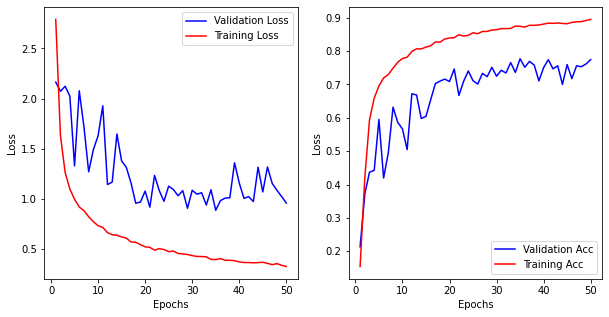

In [ ]:
model_val_loss = h.history['val_loss']
model_train_loss = h.history['loss']
model_val_acc = h.history['val_accuracy']
model_train_acc = h.history['accuracy']


epochs = range(1,51)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, model_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, model_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, model_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Performance has slightly improved. Let's increase the noise to increase regularization

In [ ]:
model =  Sequential()
model.add(Dense(512, input_shape = (32*32,), activation='relu', kernel_initializer='he_normal'))
model.add(GaussianNoise(0.2))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.1))


model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               524800    
_________________________________________________________________
gaussian_noise_2 (GaussianNo (None, 512)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                2570      
Total params: 660,746
Trainable params: 659,722
Non-trainable params: 1,024
___________________________________________

In [ ]:
opt = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics='accuracy')
h= model.fit(train_X, train_y, batch_size=512, epochs=50, validation_data=(test_X, test_y))

Epoch 1/50
53/53 [==============================] - 3s 60ms/step - loss: 2.9366 - accuracy: 0.1390 - val_loss: 2.0741 - val_accuracy: 0.2948
Epoch 2/50
53/53 [==============================] - 3s 55ms/step - loss: 1.6333 - accuracy: 0.4326 - val_loss: 1.8152 - val_accuracy: 0.4456
Epoch 3/50
53/53 [==============================] - 3s 55ms/step - loss: 1.2497 - accuracy: 0.6000 - val_loss: 2.6230 - val_accuracy: 0.3491
Epoch 4/50
53/53 [==============================] - 3s 57ms/step - loss: 1.0990 - accuracy: 0.6576 - val_loss: 1.2798 - val_accuracy: 0.6088
Epoch 5/50
53/53 [==============================] - 3s 56ms/step - loss: 0.9856 - accuracy: 0.6963 - val_loss: 1.2778 - val_accuracy: 0.5982
Epoch 6/50
53/53 [==============================] - 3s 56ms/step - loss: 0.9126 - accuracy: 0.7227 - val_loss: 1.6163 - val_accuracy: 0.5341
Epoch 7/50
53/53 [==============================] - 3s 56ms/step - loss: 0.8724 - accuracy: 0.7357 - val_loss: 2.1106 - val_accuracy: 0.4568
Epoch 8/50
53

In [ ]:
results = model.evaluate(val_X, val_y)

210/210 [==============================] - 2s 10ms/step - loss: 1.0140 - accuracy: 0.7704


## Improved performance but very minimal increase

### Let's try a different architecture with additional layers and more neurons

In [ ]:
model =  Sequential()
model.add(Dense(1024, input_shape = (32*32,), activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.1))
model.add(GaussianNoise(0.1))
model.add(BatchNormalization())

model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.1))


model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
gaussian_noise_3 (GaussianNo (None, 1024)              0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_24 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)             

In [ ]:
opt = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics='accuracy')
h= model.fit(train_X, train_y, batch_size=512, epochs=50, validation_data=(test_X, test_y))

Epoch 1/50
53/53 [==============================] - 8s 145ms/step - loss: 3.3479 - accuracy: 0.1009 - val_loss: 2.3029 - val_accuracy: 0.1008
Epoch 2/50
53/53 [==============================] - 7s 138ms/step - loss: 2.3029 - accuracy: 0.1014 - val_loss: 2.3027 - val_accuracy: 0.1007
Epoch 3/50
53/53 [==============================] - 7s 139ms/step - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3027 - val_accuracy: 0.1006
Epoch 4/50
53/53 [==============================] - 7s 140ms/step - loss: 2.3026 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.1007
Epoch 5/50
53/53 [==============================] - 7s 139ms/step - loss: 2.3027 - accuracy: 0.1010 - val_loss: 2.3027 - val_accuracy: 0.1006
Epoch 6/50
53/53 [==============================] - 7s 139ms/step - loss: 2.3025 - accuracy: 0.1003 - val_loss: 2.3015 - val_accuracy: 0.1023
Epoch 7/50
53/53 [==============================] - 7s 138ms/step - loss: 2.2978 - accuracy: 0.1084 - val_loss: 2.3003 - val_accuracy: 0.1036
Epoch 

In [ ]:
model.evaluate(val_X,val_y)

210/210 [==============================] - 1s 7ms/step - loss: 0.7449 - accuracy: 0.7768


[0.7449444532394409, 0.7767857313156128]

## Reduce the number of neurons as performance with increased parameters is not improving and it's taking too much time to train

In [ ]:
model =  Sequential()
model.add(Dense(512, input_shape = (32*32,), activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.1))
model.add(GaussianNoise(0.1))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.1))


model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
gaussian_noise_9 (GaussianNo (None, 512)               0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
dense_48 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)             

In [ ]:
opt = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics='accuracy')
h= model.fit(train_X, train_y, batch_size=512, epochs=50, validation_data=(test_X, test_y))

Epoch 1/50
53/53 [==============================] - 4s 69ms/step - loss: 2.4101 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1008
Epoch 2/50
53/53 [==============================] - 3s 63ms/step - loss: 2.3029 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1009
Epoch 3/50
53/53 [==============================] - 3s 62ms/step - loss: 2.2968 - accuracy: 0.1044 - val_loss: 2.2888 - val_accuracy: 0.1137
Epoch 4/50
53/53 [==============================] - 3s 62ms/step - loss: 2.2669 - accuracy: 0.1143 - val_loss: 2.2519 - val_accuracy: 0.1276
Epoch 5/50
53/53 [==============================] - 3s 63ms/step - loss: 2.2484 - accuracy: 0.1223 - val_loss: 2.3939 - val_accuracy: 0.1013
Epoch 6/50
53/53 [==============================] - 3s 63ms/step - loss: 2.2448 - accuracy: 0.1244 - val_loss: 2.2208 - val_accuracy: 0.1355
Epoch 7/50
53/53 [==============================] - 3s 62ms/step - loss: 2.2362 - accuracy: 0.1289 - val_loss: 2.3046 - val_accuracy: 0.1191
Epoch 8/50
53

In [ ]:
results = model.evaluate(val_X, val_y)

210/210 [==============================] - 1s 6ms/step - loss: 0.7251 - accuracy: 0.7817


Improvement by about 1%

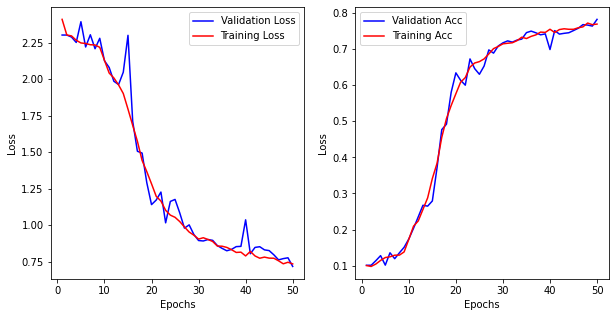

In [ ]:
model_val_loss = h.history['val_loss']
model_train_loss = h.history['loss']
model_val_acc = h.history['val_accuracy']
model_train_acc = h.history['accuracy']


epochs = range(1,51)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, model_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, model_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, model_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# Try Different Learning rate & different optimizer
opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics='accuracy')
h= model.fit(train_X, train_y, batch_size=512, epochs=50, validation_data=(test_X, test_y))

Epoch 1/50
53/53 [==============================] - 3s 65ms/step - loss: 2.4562 - accuracy: 0.1321 - val_loss: 2.2489 - val_accuracy: 0.1896
Epoch 2/50
53/53 [==============================] - 3s 62ms/step - loss: 1.8917 - accuracy: 0.3301 - val_loss: 1.6600 - val_accuracy: 0.5152
Epoch 3/50
53/53 [==============================] - 3s 64ms/step - loss: 1.4399 - accuracy: 0.5146 - val_loss: 1.3459 - val_accuracy: 0.5793
Epoch 4/50
53/53 [==============================] - 3s 62ms/step - loss: 1.2602 - accuracy: 0.5923 - val_loss: 1.2390 - val_accuracy: 0.5931
Epoch 5/50
53/53 [==============================] - 3s 63ms/step - loss: 1.1738 - accuracy: 0.6229 - val_loss: 1.1243 - val_accuracy: 0.6371
Epoch 6/50
53/53 [==============================] - 3s 62ms/step - loss: 1.0967 - accuracy: 0.6523 - val_loss: 1.0736 - val_accuracy: 0.6552
Epoch 7/50
53/53 [==============================] - 3s 63ms/step - loss: 1.0537 - accuracy: 0.6658 - val_loss: 1.0215 - val_accuracy: 0.6760
Epoch 8/50
53

In [ ]:
results = model.evaluate(val_X, val_y)

210/210 [==============================] - 1s 4ms/step - loss: 0.6687 - accuracy: 0.7967


Thats Best results so far

In [ ]:
opt = optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics='accuracy')
h= model.fit(train_X, train_y, batch_size=512, epochs=50, validation_data=(test_X, test_y))

Epoch 1/50
53/53 [==============================] - 4s 76ms/step - loss: 2.3869 - accuracy: 0.1438 - val_loss: 2.1297 - val_accuracy: 0.2011
Epoch 2/50
53/53 [==============================] - 4s 67ms/step - loss: 2.0212 - accuracy: 0.2555 - val_loss: 2.0997 - val_accuracy: 0.2903
Epoch 3/50
53/53 [==============================] - 3s 66ms/step - loss: 1.7967 - accuracy: 0.3678 - val_loss: 2.0912 - val_accuracy: 0.3003
Epoch 4/50
53/53 [==============================] - 4s 67ms/step - loss: 1.6429 - accuracy: 0.4286 - val_loss: 1.4991 - val_accuracy: 0.4706
Epoch 5/50
53/53 [==============================] - 4s 67ms/step - loss: 1.5491 - accuracy: 0.4693 - val_loss: 1.6016 - val_accuracy: 0.4408
Epoch 6/50
53/53 [==============================] - 4s 69ms/step - loss: 1.4558 - accuracy: 0.5170 - val_loss: 1.4327 - val_accuracy: 0.5279
Epoch 7/50
53/53 [==============================] - 4s 68ms/step - loss: 1.3764 - accuracy: 0.5485 - val_loss: 1.5933 - val_accuracy: 0.4986
Epoch 8/50
53

In [ ]:
results = model.evaluate(val_X, val_y)

210/210 [==============================] - 1s 4ms/step - loss: 1.0470 - accuracy: 0.6598


## RMSpropr with decereased learning rate

In [ ]:
opt = optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics='accuracy')
h= model.fit(train_X, train_y, batch_size=512, epochs=50, validation_data=(test_X, test_y))

Epoch 1/50
53/53 [==============================] - 4s 69ms/step - loss: 0.7003 - accuracy: 0.7777 - val_loss: 0.6842 - val_accuracy: 0.7957
Epoch 2/50
53/53 [==============================] - 4s 67ms/step - loss: 0.6635 - accuracy: 0.7902 - val_loss: 0.6848 - val_accuracy: 0.7957
Epoch 3/50
53/53 [==============================] - 4s 67ms/step - loss: 0.6612 - accuracy: 0.7868 - val_loss: 0.6684 - val_accuracy: 0.8009
Epoch 4/50
53/53 [==============================] - 4s 67ms/step - loss: 0.6481 - accuracy: 0.7924 - val_loss: 0.6733 - val_accuracy: 0.7983
Epoch 5/50
53/53 [==============================] - 4s 68ms/step - loss: 0.6547 - accuracy: 0.7907 - val_loss: 0.6787 - val_accuracy: 0.7976
Epoch 6/50
53/53 [==============================] - 4s 67ms/step - loss: 0.6481 - accuracy: 0.7950 - val_loss: 0.6648 - val_accuracy: 0.8012
Epoch 7/50
53/53 [==============================] - 4s 68ms/step - loss: 0.6495 - accuracy: 0.7945 - val_loss: 0.6714 - val_accuracy: 0.7986
Epoch 8/50
53

In [ ]:
results = model.evaluate(val_X, val_y)

210/210 [==============================] - 1s 4ms/step - loss: 0.6611 - accuracy: 0.8033


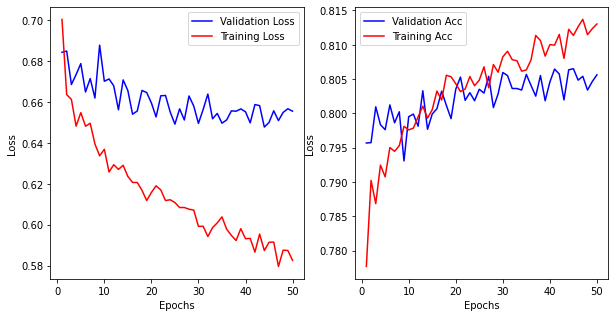

In [ ]:
model_val_loss = h.history['val_loss']
model_train_loss = h.history['loss']
model_val_acc = h.history['val_accuracy']
model_train_acc = h.history['accuracy']


epochs = range(1,51)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, model_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, model_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, model_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## Increase a layer

In [ ]:
model =  Sequential()
model.add(Dense(512, input_shape = (32*32,), activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.1))
model.add(GaussianNoise(0.1))
model.add(BatchNormalization())

model.add(Dense(512, input_shape = (32*32,), activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.1))

model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
gaussian_noise_11 (GaussianN (None, 512)               0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
dense_57 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 256)             

In [ ]:
opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics='accuracy')
h= model.fit(train_X, train_y, batch_size=512, epochs=50, validation_data=(test_X, test_y))

Epoch 1/50
53/53 [==============================] - 5s 93ms/step - loss: 2.4036 - accuracy: 0.1179 - val_loss: 2.3026 - val_accuracy: 0.1141
Epoch 2/50
53/53 [==============================] - 5s 87ms/step - loss: 2.0682 - accuracy: 0.2352 - val_loss: 1.9217 - val_accuracy: 0.3167
Epoch 3/50
53/53 [==============================] - 5s 88ms/step - loss: 1.5687 - accuracy: 0.4549 - val_loss: 1.3985 - val_accuracy: 0.5468
Epoch 4/50
53/53 [==============================] - 5s 88ms/step - loss: 1.3268 - accuracy: 0.5603 - val_loss: 1.2864 - val_accuracy: 0.5633
Epoch 5/50
53/53 [==============================] - 5s 88ms/step - loss: 1.2134 - accuracy: 0.6067 - val_loss: 1.0761 - val_accuracy: 0.6579
Epoch 6/50
53/53 [==============================] - 5s 87ms/step - loss: 1.1348 - accuracy: 0.6355 - val_loss: 1.0895 - val_accuracy: 0.6552
Epoch 7/50
53/53 [==============================] - 5s 87ms/step - loss: 1.0772 - accuracy: 0.6553 - val_loss: 0.9970 - val_accuracy: 0.6874
Epoch 8/50
53

In [ ]:
results=model.evaluate(val_X, val_y)

210/210 [==============================] - 1s 5ms/step - loss: 0.6921 - accuracy: 0.7917


In [ ]:
#Import tensorboard callback which will passed in model.fit function.
from keras.callbacks import TensorBoard
from time import time


#Setting the directory to store the logs.
tensorboard = TensorBoard(log_dir=".logs/{}".format(time()))
from keras.callbacks import EarlyStopping, ModelCheckpoint

### Initializing Early stopping and Model chekpoint callbacks

In [ ]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('svnh_dense_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           save_freq=1)

In [ ]:
opt = optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model.fit(train_X, train_y,
          batch_size=512,
          epochs=50,
          verbose=1,
          validation_data=(test_X, test_y),
          callbacks=[tensorboard,early_stopping])

Epoch 1/50
53/53 [==============================] - 5s 93ms/step - loss: 0.9318 - accuracy: 0.7031 - val_loss: 0.9360 - val_accuracy: 0.7057
Epoch 2/50
53/53 [==============================] - 5s 89ms/step - loss: 0.9176 - accuracy: 0.7071 - val_loss: 0.9246 - val_accuracy: 0.7070
Epoch 3/50
53/53 [==============================] - 5s 91ms/step - loss: 0.8968 - accuracy: 0.7140 - val_loss: 1.1370 - val_accuracy: 0.6507
Epoch 4/50
53/53 [==============================] - 5s 89ms/step - loss: 0.8745 - accuracy: 0.7217 - val_loss: 1.0950 - val_accuracy: 0.6637
Epoch 5/50
53/53 [==============================] - 5s 89ms/step - loss: 0.8703 - accuracy: 0.7212 - val_loss: 1.2299 - val_accuracy: 0.6146
Epoch 6/50
53/53 [==============================] - 5s 90ms/step - loss: 0.8508 - accuracy: 0.7295 - val_loss: 1.3634 - val_accuracy: 0.6224
Epoch 7/50
53/53 [==============================] - 5s 90ms/step - loss: 0.8403 - accuracy: 0.7336 - val_loss: 1.1585 - val_accuracy: 0.6343
Epoch 8/50
53

In [ ]:
results = model.evaluate(val_X, val_y)

210/210 [==============================] - 2s 10ms/step - loss: 0.9756 - accuracy: 0.7068


In [ ]:
opt = optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics='accuracy')
model.fit(train_X, train_y,
          batch_size=512,
          epochs=50,
          verbose=1,
          validation_data=(test_X, test_y),
          callbacks=[tensorboard,early_stopping])

Epoch 1/50
53/53 [==============================] - 5s 97ms/step - loss: 0.4957 - accuracy: 0.8392 - val_loss: 0.6234 - val_accuracy: 0.8177
Epoch 2/50
53/53 [==============================] - 5s 92ms/step - loss: 0.4700 - accuracy: 0.8467 - val_loss: 0.6173 - val_accuracy: 0.8181
Epoch 3/50
53/53 [==============================] - 5s 94ms/step - loss: 0.4648 - accuracy: 0.8466 - val_loss: 0.6214 - val_accuracy: 0.8189
Epoch 4/50
53/53 [==============================] - 5s 94ms/step - loss: 0.4618 - accuracy: 0.8478 - val_loss: 0.6133 - val_accuracy: 0.8187
Epoch 5/50
53/53 [==============================] - 5s 92ms/step - loss: 0.4639 - accuracy: 0.8495 - val_loss: 0.6146 - val_accuracy: 0.8184
Epoch 6/50
53/53 [==============================] - 5s 95ms/step - loss: 0.4601 - accuracy: 0.8485 - val_loss: 0.6205 - val_accuracy: 0.8174
Epoch 7/50
53/53 [==============================] - 5s 92ms/step - loss: 0.4587 - accuracy: 0.8518 - val_loss: 0.6156 - val_accuracy: 0.8208
Epoch 8/50
53

In [ ]:
results = model.evaluate(val_X, val_y)

210/210 [==============================] - 1s 7ms/step - loss: 0.6073 - accuracy: 0.8232


#### Best Results so far

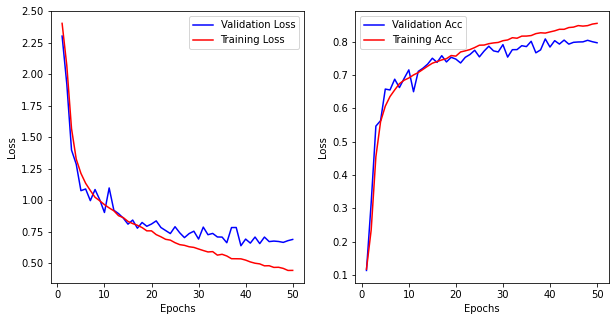

In [ ]:
model_val_loss = h.history['val_loss']
model_train_loss = h.history['loss']
model_val_acc = h.history['val_accuracy']
model_train_acc = h.history['accuracy']


epochs = range(1,51)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, model_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, model_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, model_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
opt = optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics='accuracy')
model.fit(train_X, train_y,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(test_X, test_y),
          callbacks=[tensorboard,early_stopping])

Epoch 1/25
105/105 [==============================] - 6s 54ms/step - loss: 0.4360 - accuracy: 0.8558 - val_loss: 0.6083 - val_accuracy: 0.8267
Epoch 2/25
105/105 [==============================] - 5s 50ms/step - loss: 0.4253 - accuracy: 0.8615 - val_loss: 0.6121 - val_accuracy: 0.8236
Epoch 3/25
105/105 [==============================] - 5s 50ms/step - loss: 0.4278 - accuracy: 0.8599 - val_loss: 0.6153 - val_accuracy: 0.8232
Epoch 4/25
105/105 [==============================] - 5s 51ms/step - loss: 0.4273 - accuracy: 0.8595 - val_loss: 0.6009 - val_accuracy: 0.8262
Epoch 5/25
105/105 [==============================] - 5s 52ms/step - loss: 0.4199 - accuracy: 0.8625 - val_loss: 0.6182 - val_accuracy: 0.8239
Epoch 6/25
105/105 [==============================] - 7s 69ms/step - loss: 0.4224 - accuracy: 0.8596 - val_loss: 0.6030 - val_accuracy: 0.8267
Epoch 7/25
105/105 [==============================] - 5s 52ms/step - loss: 0.4195 - accuracy: 0.8619 - val_loss: 0.6118 - val_accuracy: 0.8244

In [ ]:
results = model.evaluate(val_X, val_y)

210/210 [==============================] - 1s 5ms/step - loss: 0.6097 - accuracy: 0.8226


## Let's try leaky relu with increased nodes, drop out and reduced learning rate.


In [ ]:
from keras.layers import LeakyReLU

In [ ]:
model =  Sequential()
model.add(Dense(512, input_shape = (32*32,), kernel_initializer='he_normal'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))
model.add(GaussianNoise(0.2))
model.add(BatchNormalization())

model.add(Dense(512, input_shape = (32*32,), kernel_initializer='he_normal'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))

model.add(Dense(256, kernel_initializer='he_normal'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))

model.add(Dense(128, kernel_initializer='he_normal'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))

model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 512)               0         
_________________________________________________________________
gaussian_noise_15 (GaussianN (None, 512)               0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 512)               2048      
_________________________________________________________________
dense_78 (Dense)             (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 512)             

In [ ]:
opt = optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics='accuracy')
model.fit(train_X, train_y,
          batch_size=256,
          epochs=50,
          verbose=1,
          validation_data=(test_X, test_y),
          callbacks=[tensorboard,early_stopping])

Epoch 1/50
105/105 [==============================] - 6s 56ms/step - loss: 2.6120 - accuracy: 0.1108 - val_loss: 2.2700 - val_accuracy: 0.1842
Epoch 2/50
105/105 [==============================] - 6s 52ms/step - loss: 2.3290 - accuracy: 0.1512 - val_loss: 2.1332 - val_accuracy: 0.3050
Epoch 3/50
105/105 [==============================] - 6s 53ms/step - loss: 2.1226 - accuracy: 0.2296 - val_loss: 1.8422 - val_accuracy: 0.3867
Epoch 4/50
105/105 [==============================] - 5s 52ms/step - loss: 1.8567 - accuracy: 0.3385 - val_loss: 1.5236 - val_accuracy: 0.5019
Epoch 5/50
105/105 [==============================] - 5s 52ms/step - loss: 1.6622 - accuracy: 0.4197 - val_loss: 1.3305 - val_accuracy: 0.5807
Epoch 6/50
105/105 [==============================] - 6s 54ms/step - loss: 1.5196 - accuracy: 0.4805 - val_loss: 1.1932 - val_accuracy: 0.6296
Epoch 7/50
105/105 [==============================] - 7s 62ms/step - loss: 1.4150 - accuracy: 0.5267 - val_loss: 1.1544 - val_accuracy: 0.6364

In [ ]:
results = model.evaluate(val_X, val_y)

210/210 [==============================] - 1s 5ms/step - loss: 0.6575 - accuracy: 0.8001


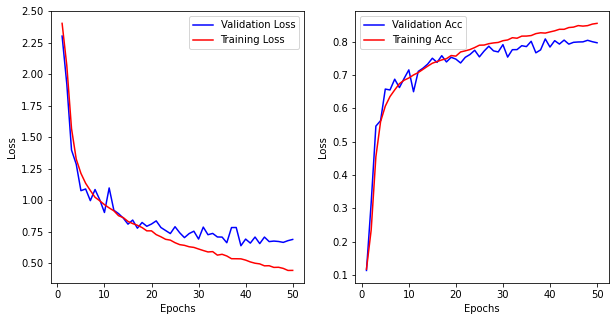

In [ ]:
model_val_loss = h.history['val_loss']
model_train_loss = h.history['loss']
model_val_acc = h.history['val_accuracy']
model_train_acc = h.history['accuracy']


epochs = range(1,51)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, model_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, model_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, model_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## Vizualizing Test predictions

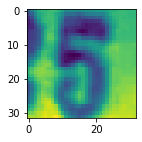

Actual Digit is:  5


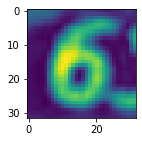

Actual Digit is:  6


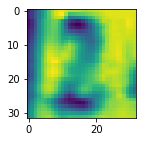

Actual Digit is:  2


In [ ]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(X_test[50])
plt.show()
print( "Actual Digit is: ",np.argmax(model.predict(test_X)[50]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[500])
plt.show()
print( "Actual Digit is: ",np.argmax(model.predict(test_X)[500]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[1500])
plt.show()
print( "Actual Digit is: ",np.argmax(model.predict(test_X)[1500]))
#print(np.argmax(model.predict(X_test[3].reshape(784,1))))

## Save the model to be able to upload the weights later and predict

In [ ]:
#Set the path where you want to store the model and weights. 
model.save('/content/drive/My Drive/Colab Notebooks/AIML/ANN/Dense_svnh.h5')
model.save_weights('/content/drive/My Drive/Colab Notebooks/AIML/ANN/Dense_svnh_weights.h5')

### Create the model architecture for the weights to be imported and fit into respective layers

In [ ]:
m =  Sequential()
m.add(Dense(512, input_shape = (32*32,), kernel_initializer='he_normal'))
m.add(LeakyReLU(alpha=0.1))
m.add(Dropout(0.1))
m.add(GaussianNoise(0.2))
m.add(BatchNormalization())

m.add(Dense(512, input_shape = (32*32,), kernel_initializer='he_normal'))
m.add(LeakyReLU(alpha=0.1))
m.add(Dropout(0.1))

m.add(Dense(256, kernel_initializer='he_normal'))
m.add(LeakyReLU(alpha=0.1))
m.add(Dropout(0.1))

m.add(Dense(128, kernel_initializer='he_normal'))
m.add(LeakyReLU(alpha=0.1))
m.add(Dropout(0.1))

m.add(Dense(10, activation='softmax'))
m.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 512)               0         
_________________________________________________________________
gaussian_noise_16 (GaussianN (None, 512)               0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 512)               2048      
_________________________________________________________________
dense_83 (Dense)             (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 512)             

In [ ]:
#The pre-trained weights must exist in the current folder
m.load_weights('/content/drive/My Drive/Colab Notebooks/AIML/ANN/Dense_svnh_weights.h5')

In [ ]:
opt = optimizers.Adam(learning_rate=0.01)
m.compile(optimizer = opt, loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
m.evaluate(val_X,val_y)

210/210 [==============================] - 1s 4ms/step - loss: 0.6575 - accuracy: 0.8001


[0.6575373411178589, 0.8001487851142883]

## Visualize predictions

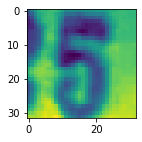

Actual Digit is:  5


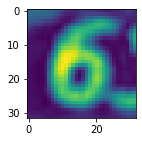

Actual Digit is:  6


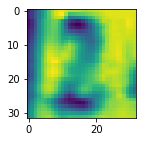

Actual Digit is:  2


In [ ]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(X_test[50])
plt.show()
print( "Actual Digit is: ",np.argmax(m.predict(test_X)[50]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[500])
plt.show()
print( "Actual Digit is: ",np.argmax(m.predict(test_X)[500]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[1500])
plt.show()
print( "Actual Digit is: ",np.argmax(m.predict(test_X)[1500]))
#print(np.argmax(model.predict(X_test[3].reshape(784,1))))